<mark>Cocktail tábla</mark>

<mark>1\. Price oszlop</mark>

In [ ]:
SELECT *
FROM Cocktail

1.1. Koktél árak elemzése

In [ ]:
SELECT
    MIN(Price) AS 'Legolcsóbb koktél',
    MAX(Price) AS 'Legdrágább koktél',
    AVG(Price) AS 'Átlag ár'
FROM Cocktail

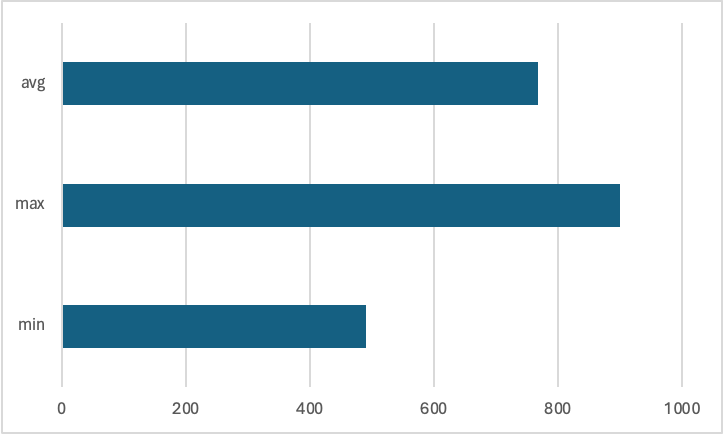

1.2. Árak szerinti csoportosítás

In [4]:
DECLARE 
@min int = 700,
@max int = 850;   

SELECT 
    SUM(CASE WHEN Price < @min THEN 1 ELSE 0 end) AS 'Olcsó',
    SUM(CASE WHEN Price BETWEEN @min and @max THEN 1 ELSE 0 end) AS 'Átlagos',
    SUM(CASE WHEN PRice > @max THEN 1 ELSE 0 end) AS 'Drága'
FROM Cocktail

(1 row affected)

Total execution time: 00:00:00.019

Olcsó,Átlagos,Drága
5,8,6


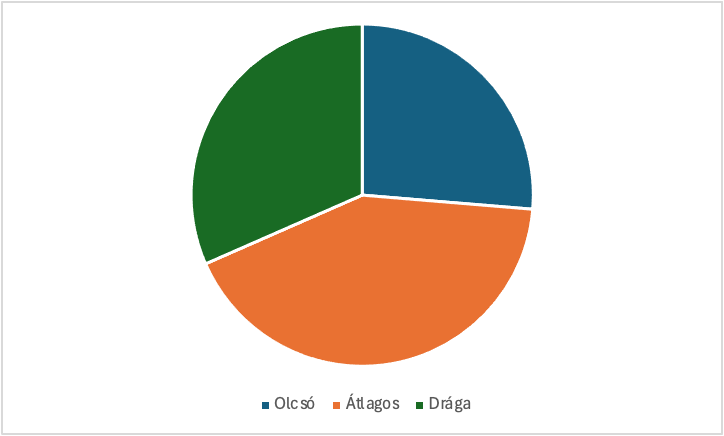

1.3. Standard deviation, Varience

In [ ]:
SELECT
    STDEV(Price) AS 'STDEV', 
    VAR(Price) AS 'VAR'
FROM Cocktail
WHERE Price IS NOT NULL

<mark>**2\. Name oszlop**</mark>

In [ ]:
SELECT *
FROM Cocktail

2.1. Leghosszabb nevű koktél + karakterszám

In [ ]:
SELECT TOP 1 Name AS 'Leghosszabb név',
    LEN(Name) AS 'karakterszám'
FROM Cocktail
GROUP BY Name
ORDER BY 2 DESC

2.2. Legrövidebb nevű koktél + karakterszám

In [ ]:
SELECT TOP 1 Name AS 'Legrövidebb név',
    LEN(Name) AS 'karakterszám'
FROM Cocktail
GROUP BY Name
ORDER BY 2

2.3. Összes koktélszám (név)

In [ ]:
SELECT COUNT(*) AS 'Koktélok száma'
FROM Cocktail

+1: top 3 legnépszerűbb koktél típus

In [ ]:
SELECT TOP 3
    t.Name AS 'Kategória',
    COUNT(*) Darab
FROM Cocktail c JOIN [Type] t ON c.TypeFK = t.TypeID
WHERE TypeFK IS not null
GROUP BY t.Name, c.TypeFK
ORDER BY COUNT(*) desc